In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dados = pd.read_csv('comp_bikes_mod.csv')

In [7]:
dados

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [8]:
dados.shape

(17379, 17)

In [9]:
dados.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [10]:
dados['temp'].isnull().sum()/100

17.38

In [0]:
dados.dropna(axis=0, subset=['dteday'], inplace=True)

In [12]:
dados.describe().round(4)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.0000,14061.0000,14076.0000,14062.0000,14068.0000,14076.0000,14078.0000,14097.0000,14078.0000,14066.0000,14076.0000,14070.0000,14082.0000,14071.0000,14090.0000,14079.0000
mean,8679.7175,2.5079,0.5016,6.5428,11.4868,0.0277,3.0065,0.6831,1.4224,0.4969,0.4761,0.6274,0.1896,35.4163,153.2806,189.1658
std,5015.9601,1.1107,0.5000,3.4437,6.9151,0.1641,2.0028,0.4653,0.6389,0.1930,0.1728,0.1929,0.1223,48.7708,151.3179,181.2236
min,2.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,4336.2500,2.0000,0.0000,4.0000,6.0000,0.0000,1.0000,0.0000,1.0000,0.3400,0.3333,0.4800,0.1045,4.0000,34.0000,40.0000
50%,8677.5000,3.0000,1.0000,7.0000,11.0000,0.0000,3.0000,1.0000,1.0000,0.5000,0.4848,0.6300,0.1642,17.0000,115.0000,142.0000
75%,13024.2500,3.0000,1.0000,10.0000,17.0000,0.0000,5.0000,1.0000,2.0000,0.6600,0.6212,0.7800,0.2537,48.0000,219.0000,280.0000
max,17376.0000,4.0000,1.0000,12.0000,23.0000,1.0000,6.0000,1.0000,4.0000,1.0000,1.0000,1.0000,0.8507,367.0000,886.0000,977.0000


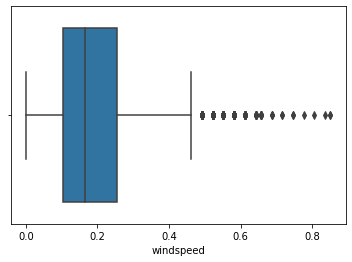

In [13]:
sns.boxplot(dados['windspeed'])

Text(0.5, 1.08, 'Dispersão entre variáveis')

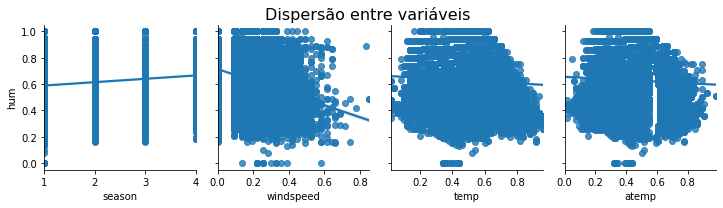

In [14]:
ax = sns.pairplot(dados, y_vars='hum', x_vars=['season', 'windspeed', 'temp', 'atemp'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)

Text(0.5, 1.08, 'Dispersão entre variáveis')

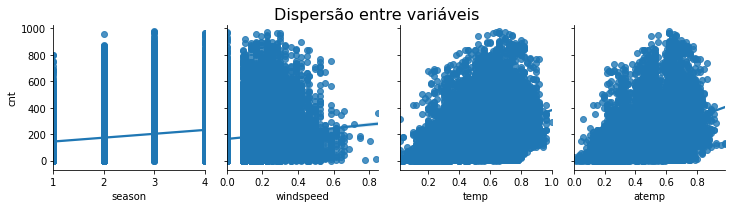

In [15]:
ax = sns.pairplot(dados, y_vars='cnt', x_vars=['season', 'windspeed', 'temp', 'atemp'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)

In [16]:
dados_new = pd.DataFrame(dados, columns = ['season', 'windspeed', 'temp', 'atemp', 'hum', 'cnt'])
dados_new

,season,windspeed,temp,atemp,hum,cnt
1,1.0,0.0000,0.22,0.2727,0.80,40.0
2,1.0,0.0000,0.22,0.2727,0.80,32.0
3,1.0,0.0000,0.24,0.2879,0.75,13.0
4,1.0,0.0000,0.24,0.2879,0.75,1.0
5,1.0,0.0896,0.24,0.2576,0.75,1.0
...,...,...,...,...,...,...
17373,1.0,0.1343,0.26,NaN,0.48,122.0
17374,NaN,0.1642,0.26,0.2576,0.60,119.0
17375,1.0,0.1642,0.26,0.2576,0.60,89.0
17377,1.0,0.1343,0.26,0.2727,0.56,61.0


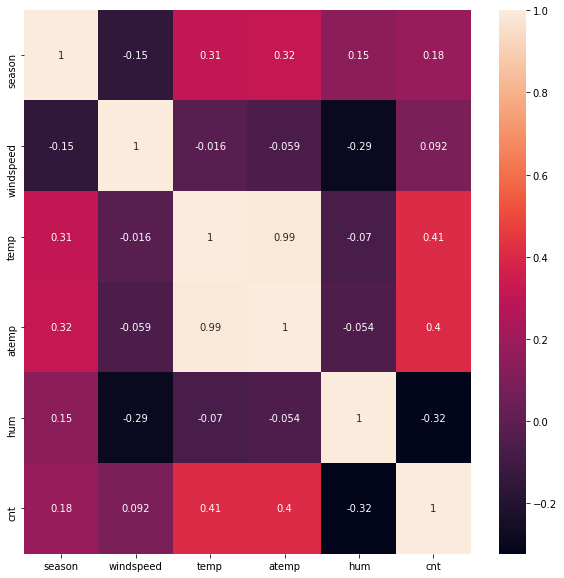

In [17]:
plt.figure(figsize=(10,10))
matriz_correlacao = dados_new.corr()
sns.heatmap(matriz_correlacao, annot=True)

In [0]:
dados['casual'].fillna(value = dados['casual'].mean(), inplace=True)

In [0]:
dados['cnt'].fillna(value = dados['cnt'].mean(), inplace=True)

In [0]:
dados['hum'].fillna(value = dados['hum'].mean(), inplace=True)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
X = pd.DataFrame(dados, columns=['hum', 'casual'])

In [0]:
y = dados['cnt']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state = 420)

In [0]:
modelo = LinearRegression()

In [26]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.41


In [0]:
y_pred = modelo.predict(X_test)

In [29]:
print('R² = %s' % metrics.r2_score(y_test, y_pred).round(2))

R² = 0.39
